In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/diabetes.csv'
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df = pd.DataFrame(data)
df.head(4)

Mounted at /content/drive
/content/drive/MyDrive/diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
from sklearn.metrics import mutual_info_score

def mis(arg, kwargs):
  mis = mutual_info_score(arg, kwargs)
  return mis

In [8]:
ListMis = []
ListMis.append(mis(df['Pregnancies'], df['Outcome']))
ListMis.append(mis(df['Glucose'], df['Outcome']))
ListMis.append(mis(df['BloodPressure'], df['Outcome']))
ListMis.append(mis(df['SkinThickness'], df['Outcome']))
ListMis.append(mis(df['Insulin'], df['Outcome']))
ListMis.append(mis(df['DiabetesPedigreeFunction'], df['Outcome']))
ListMis.append(mis(df['Age'], df['Outcome']))
ListMis.append(mis(df['BMI'], df['Outcome']))

In [9]:
ListMis

[0.04285406127277179,
 0.21085615360952042,
 0.04111026790882456,
 0.05660541023678324,
 0.19206729136136813,
 0.45118180206849473,
 0.09769272275595872,
 0.2383113668395052]

In [10]:
ListMis.sort(reverse=True)
print(ListMis[0:-1])

[0.45118180206849473, 0.2383113668395052, 0.21085615360952042, 0.19206729136136813, 0.09769272275595872, 0.05660541023678324, 0.04285406127277179]


In [11]:
x = pd.DataFrame(data).drop(columns=['Pregnancies','SkinThickness', 'Outcome','BloodPressure'])
y = pd.DataFrame(data).Outcome

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

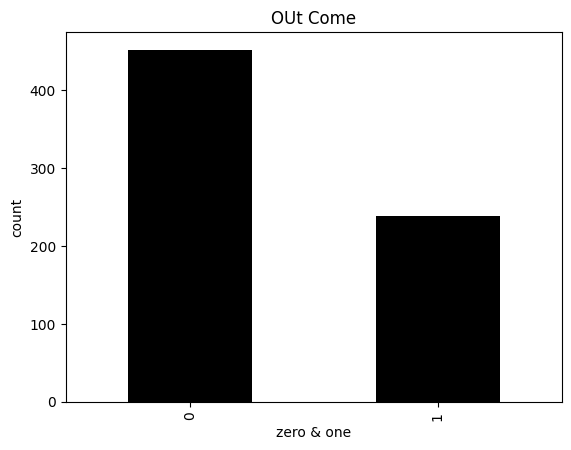

In [13]:
y_train.value_counts(dropna = False).plot.bar(color = 'black')
plt.title('OUt Come')
plt.xlabel('zero & one')
plt.ylabel('count')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

transf_x_train = sc.fit_transform(x_train)
transf_x_test = sc.fit_transform(x_test)

In [15]:
print("Number transactions X_train dataset: ", transf_x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", transf_x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (691, 5)
Number transactions y_train dataset:  (691,)
Number transactions X_test dataset:  (77, 5)
Number transactions y_test dataset:  (77,)


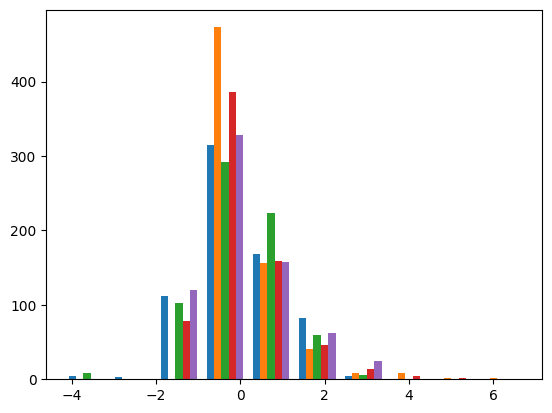

In [16]:
plt.hist(transf_x_train, bins=10)
plt.show()

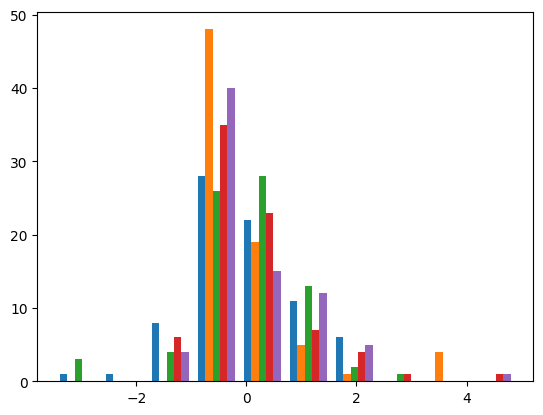

In [17]:
plt.hist(transf_x_test, bins=10)
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
GNB = GaussianNB()

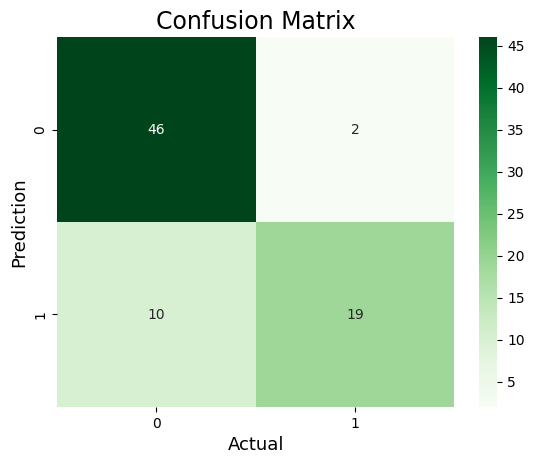

In [19]:
GNB.fit(transf_x_train, y_train)

pred = GNB.predict(transf_x_test)

conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix, annot=True, cmap='Greens')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [20]:
print("accureccy: {:.2f} %".format(accuracy_score(y_test, pred)*100))

accureccy: 84.42 %


In [28]:
print(GNB.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [29]:
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [30]:
param_grid = {
    'var_smoothing' : np.logspace(0, -9, num=100)
}

In [31]:
grid_search = GridSearchCV(GNB,
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1)

In [32]:
grid_search.fit(transf_x_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc')

In [38]:
gdf = pd.DataFrame(grid_search.cv_results_)

In [40]:
gdf.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002760,0.001790,0.003319,0.000599,1.0,{'var_smoothing': 1.0},0.806159,0.906427,0.658333,0.812963,0.827778,0.811111,0.871296,0.745370,0.862963,0.809259,0.811166,0.065854,1
1,0.001935,0.000526,0.002779,0.000249,0.811131,{'var_smoothing': 0.8111308307896871},0.804348,0.906427,0.657407,0.812963,0.825000,0.812963,0.871296,0.745370,0.864815,0.810185,0.811078,0.066170,2
2,0.002192,0.000605,0.002960,0.000115,0.657933,{'var_smoothing': 0.657933224657568},0.801630,0.906427,0.656481,0.814815,0.825000,0.811111,0.871296,0.746296,0.863889,0.810185,0.810713,0.066257,3


In [45]:
split_sum = gdf.split0_test_score + gdf.split1_test_score + gdf.split2_test_score + gdf.split3_test_score + gdf.split4_test_score + gdf.split5_test_score + gdf.split6_test_score + gdf.split7_test_score + gdf.split8_test_score + gdf.split9_test_score
gdf['mean_score'] = split_sum / 9

In [47]:
gdf.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,mean_score
0,0.002760,0.001790,0.003319,0.000599,1.0,{'var_smoothing': 1.0},0.806159,0.906427,0.658333,0.812963,0.827778,0.811111,0.871296,0.74537,0.862963,0.809259,0.811166,0.065854,1,0.901296
1,0.001935,0.000526,0.002779,0.000249,0.811131,{'var_smoothing': 0.8111308307896871},0.804348,0.906427,0.657407,0.812963,0.825000,0.812963,0.871296,0.74537,0.864815,0.810185,0.811078,0.066170,2,0.901197


In [48]:
gdf.sort_values('mean_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,mean_score
18,0.001900,0.000071,0.003007,0.000117,0.023101,{'var_smoothing': 0.02310129700083159},0.798913,0.899811,0.650000,0.812963,0.818519,0.810185,0.867593,0.745370,0.863889,0.794444,0.806169,0.066606,100,0.895743
19,0.001986,0.000105,0.002983,0.000125,0.018738,{'var_smoothing': 0.01873817422860384},0.798913,0.899811,0.650926,0.812963,0.818519,0.810185,0.867593,0.745370,0.863889,0.794444,0.806261,0.066389,99,0.895846
17,0.001881,0.000097,0.003051,0.000056,0.02848,{'var_smoothing': 0.02848035868435802},0.799819,0.900756,0.650000,0.812963,0.818519,0.810185,0.867593,0.745370,0.863889,0.794444,0.806354,0.066730,98,0.895949
20,0.001882,0.000086,0.002897,0.000118,0.015199,{'var_smoothing': 0.01519911082952933},0.798913,0.899811,0.650926,0.812963,0.819444,0.810185,0.867593,0.745370,0.863889,0.794444,0.806354,0.066407,96,0.895949
21,0.001813,0.000034,0.002893,0.000070,0.012328,{'var_smoothing': 0.012328467394420659},0.798913,0.899811,0.650926,0.812963,0.819444,0.810185,0.867593,0.745370,0.863889,0.794444,0.806354,0.066407,96,0.895949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.002081,0.000062,0.003462,0.000729,0.432876,{'var_smoothing': 0.43287612810830584},0.803442,0.905482,0.655556,0.816667,0.823148,0.810185,0.870370,0.745370,0.862037,0.802778,0.809504,0.066189,5,0.899448
3,0.001864,0.000100,0.003195,0.000629,0.53367,{'var_smoothing': 0.533669923120631},0.802536,0.906427,0.655556,0.815741,0.823148,0.810185,0.870370,0.745370,0.862963,0.804630,0.809693,0.066383,4,0.899658
2,0.002192,0.000605,0.002960,0.000115,0.657933,{'var_smoothing': 0.657933224657568},0.801630,0.906427,0.656481,0.814815,0.825000,0.811111,0.871296,0.746296,0.863889,0.810185,0.810713,0.066257,3,0.900792
1,0.001935,0.000526,0.002779,0.000249,0.811131,{'var_smoothing': 0.8111308307896871},0.804348,0.906427,0.657407,0.812963,0.825000,0.812963,0.871296,0.745370,0.864815,0.810185,0.811078,0.066170,2,0.901197


In [50]:
display(gdf.iloc[18])

mean_fit_time                                          0.0019
std_fit_time                                         0.000071
mean_score_time                                      0.003007
std_score_time                                       0.000117
param_var_smoothing                                  0.023101
params                 {'var_smoothing': 0.02310129700083159}
split0_test_score                                    0.798913
split1_test_score                                    0.899811
split2_test_score                                        0.65
split3_test_score                                    0.812963
split4_test_score                                    0.818519
split5_test_score                                    0.810185
split6_test_score                                    0.867593
split7_test_score                                     0.74537
split8_test_score                                    0.863889
split9_test_score                                    0.794444
mean_tes